In [1]:
# Dependencies
import random
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import locale
from locale import atof

In [2]:
data_df = pd.read_csv('Resources/fy2016_table25d.csv',header=3, skipfooter = 10, thousands=",", usecols= [0,1,2,3,4,5,6,7,8,9,10],engine='python')
data_df.replace(["X","D","-"],[0,0,0] , inplace=True)

data_df = data_df.set_index("Class of admission")

# locale.setlocale(locale.LC_NUMERIC, '')
#data_df["2007"].apply(locale.atof)

data_df["2016"] = pd.to_numeric(data_df["2016"])
data_df["2015"] = pd.to_numeric(data_df["2015"])
data_df["2014"] = pd.to_numeric(data_df["2014"])
data_df["2013"] = pd.to_numeric(data_df["2013"])
data_df["2012"] = pd.to_numeric(data_df["2012"])
data_df["2011"] = pd.to_numeric(data_df["2011"])
data_df["2010"] = pd.to_numeric(data_df["2010"])
data_df["2009"] = pd.to_numeric(data_df["2009"])
data_df["2008"] = pd.to_numeric(data_df["2008"])
data_df["2007"] = pd.to_numeric(data_df["2007"])

data_df

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Class of admission,,,,,,,,,,
Total all admissions 1,171300000,175400000,162600000,159700000,158500000,165500000,173100000,180500000,181300000,178700000
Total I-94 admissions 2,37149651,39381928,36231554,46471569,53082286,53887286,61052260,74930606,76638236,76786751
Temporary workers and families,1932075,1949695,1703697,2816485,3385775,3049419,2996743,3398961,3722543,3896674
Temporary workers and trainees,1118138,1101938,936272,1682111,2092028,1900582,1853915,2095175,2306962,2420840
CNMI-only transitional workers (CW1),0,0,0,0,0,0,1642,4045,5096,7609
Spouses and children of CW1 (CW2),0,0,0,0,0,0,404,777,883,989
Temporary workers in specialty occupations (H1B),461730,409619,339243,454757,494565,473015,474355,511773,537450,534365
Chile and Singapore Free Trade Agreement aliens (H1B1),170,153,213,163,30,0,8,29,93,268
Registered nurses participating in the Nursing Relief for Disadvantaged Areas (H1C),49,170,231,295,124,29,7,0,0,7


In [3]:
overall_admission = data_df.sum()

years = overall_admission.keys()

years


Index(['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016'],
      dtype='object')

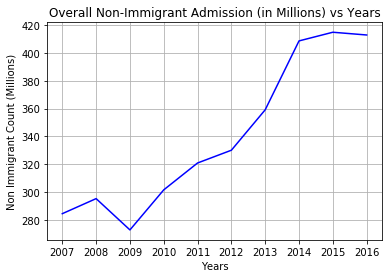

In [4]:
plt.plot(years, overall_admission/1000000, color="blue", label="Overall Admission Average" )
plt.title("Overall Non-Immigrant Admission (in Millions) vs Years")
plt.xlabel("Years")
plt.ylabel("Non Immigrant Count (Millions)")
plt.grid()
plt.savefig("Resources/Image1.png")

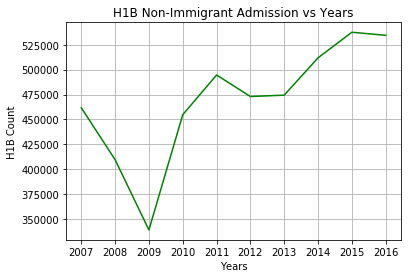

In [5]:
# Plot the unemployment values for a single country
plt.plot(years, data_df.loc['Temporary workers in specialty occupations (H1B)',['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015','2016']],color="green",label="Temporary workers in specialty occupations (H1B)")

plt.title("H1B Non-Immigrant Admission vs Years")
plt.xlabel("Years")
plt.ylabel("H1B Count")
plt.grid()

plt.savefig("Resources/Image2.png")